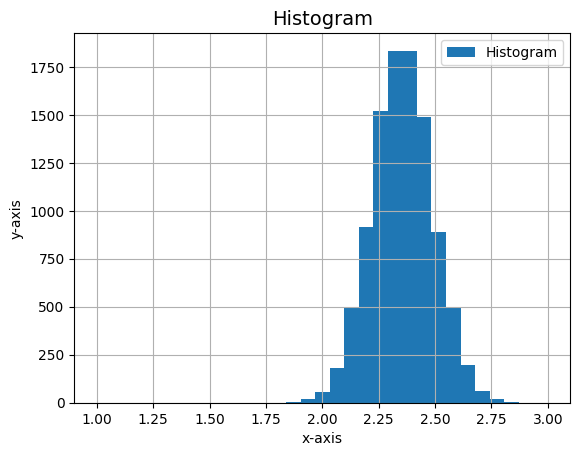

In [1]:
import spl.generate
import spl.plot
import math

a = spl.generate.list_clt_minmax(0, ((3/2)*math.pi), 10000, n_sum=100)
spl.plot.histogram(a)

In [2]:
#check by fitting data to a gaussian using the binned likelihood in imiunit

import numpy as np
from scipy.stats import norm, expon, normaltest
from iminuit import Minuit
from iminuit.cost import BinnedNLL
from math import floor, ceil, log
from IPython.display import display
from scipy.stats import chi2


def cdf(bin_edges, mu, sigma):
    return norm.cdf(bin_edges, mu, sigma)


bin_content, bin_edges = np.histogram(a, bins=int(ceil(1 + 3.322 * log(len(a)))), range=(floor(min(a)), ceil(max(a))))

#inizialization of the parameters using appropriate values
sample_mean = np.mean(a)
sample_sigma = np.std(a)

my_cost_func = BinnedNLL(bin_content, bin_edges, cdf)
N_events = sum(bin_content)
my_minuit = Minuit(my_cost_func, mu=sample_mean, sigma=sample_sigma)
my_minuit.migrad()
my_minuit.minos()
display(my_minuit)

display(my_minuit.covariance.correlation())

for key in my_minuit.parameters:
    print('parameter ' + key + ': ' +
          str(my_minuit.values[key]) + ' +- ' +
          str(my_minuit.errors[key]))

p_value_fit = 1. - chi2.cdf (my_minuit.fval, df = my_minuit.ndof)
print ('associated p-value: ' + str(p_value_fit))
if p_value_fit > 0.05: print('Test passed')

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 15.85 (χ²/ndof = 0.5)      │              Nfcn = 70               │
│ EDM = 6.73e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.3546   │  0.0014   │  -0.0014   │   0.0014   │         │         │       │
│ 1 │ sigma │ 134.7e-3  │  1.0e-3   │  -1.0e-3   │   1.0e-3   │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.0014  │  0.0014   │   -1e-3   │   1e-3    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───────┬───────────────────┐
│       │       mu    sigma │
├───────┼───────────────────┤
│    mu │ 1.85e-06        0 │
│ sigma │        0  9.4e-07 │
└───────┴───────────────────┘

,mu,sigma
mu,1,0
sigma,0,1


parameter mu: 2.354637610322064 +- 0.001359124117148567
parameter sigma: 0.1347095170809716 +- 0.0009695331387004721
associated p-value: 0.9839762346528136
Test passed


In [ ]:
#implementation of the statistics functions

def mean(sample: list[float]) -> float:
    """
    Calculation of the mean of the sample passed as argument

    Args:
        sample: list of floats representing data

    Returns:
        The mean of the sample
    """

    summ = sum(sample)
    n = len(sample)
    return summ / n

def variance(sample: list[float],
             bessel: bool = True) -> float:
    """
    Calculation of the variance of the sample present in the object

    Args:
        sample: list of floats representing data
        bessel: applies the bessel correction (optional, default: True)

    Returns:
        The variance of the sample
    """

    summ = 0.
    sum_sq = 0.
    n = len(sample)
    for elem in sample:
        summ += elem
        sum_sq += elem * elem
    var = sum_sq / n - summ * summ / (n * n)
    if bessel:
        var = n * var / (n - 1)
    return var

def stddev(sample: list[float],
           bessel: bool = True) -> float:
    """
    Calculation of the standard deviation of the sample present in the object

    Args:
        sample: list of floats representing data
        bessel: applies the bessel correction (optional, default: True)

    Returns:
        The standard deviation of the sample
    """

    return math.sqrt(variance(sample, bessel))

def skewness(sample: list[float]) -> float:
    """
    Calculation of the skewness of the sample passed as argument

    Args:
        sample: list of floats representing data

    Returns:
        The skewness of the sample
    """

    mean_sample = mean(sample)
    skew = 0.
    for x in sample:
        skew = skew + math.pow(x - mean_sample,  3)
    skew = skew / (len(sample) * math.pow(stddev(sample), 3))
    return skew

def kurtosis(sample: list[float]) -> float:
    """
    Calculation of the kurtosis of the sample passed as argument

    Args:
        sample: list of floats representing data

    Returns:
        The kurtosis of the sample
    """

    mean_sample = mean(sample)
    kurt = 0.
    for x in sample:
        kurt = kurt + math.pow(x - mean_sample,  4)
    kurt = kurt / (len(sample) * math.pow(variance(sample), 2)) - 3
    return kurt

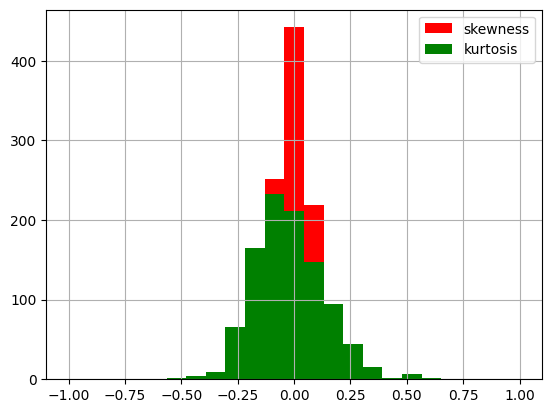

skewness: -0.0026044312381552255
kurtosis: -0.020441321430468465


In [5]:
import matplotlib.pyplot as plt

skew = []
kurt = []
all_data = []

for i in range(1000):
    toy = spl.generate.list_clt_minmax(0, ((3/2)*math.pi), 1000, n_sum=100)
    all_data.append(toy)
    skew.append(skewness(toy))
    kurt.append(kurtosis(toy))
skew_toy=mean(skew)
kurt_toy=mean(kurt)

fig, ax = plt.subplots()
ax.hist(skew, bins=np.linspace(math.floor(min(skew)), math.ceil(max(skew)),
                                                      math.ceil(1 + 3.322 * np.log(len(skew)))), label='skewness', color='red')
ax.hist(kurt, bins=np.linspace(math.floor(min(kurt)), math.ceil(max(kurt)),
                                                      math.ceil(1 + 3.322 * np.log(len(kurt)))), label='kurtosis', color='green')
ax.legend()
ax.grid(True)
plt.show()

print('skewness: ' + str(skew_toy))
print('kurtosis: ' + str(kurt_toy))